In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# **Data Structure Overview**


---


Begin by examining the structure of the dataset to understand the features, including the newly added one-hot encoded columns.

In [ ]:
# Load the dataset
eda_ohe_df = pd.read_csv('eda_OHE_telco_data.csv')

# Display the first few rows and dataset information
print(eda_ohe_df.head())
eda_ohe_df.info()

   SeniorCitizen  Partner  Dependents  tenure  PhoneService  OnlineSecurity  \
0              0        1           0       1             0               0   
1              0        0           0      34             1               1   
2              0        0           0       2             1               1   
3              0        0           0      45             0               1   
4              0        0           0       2             1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             1                 0            0            0  ...   
1             0                 1            0            0  ...   
2             1                 0            0            0  ...   
3             0                 1            1            0  ...   
4             0                 0            0            0  ...   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                  0                                 

### **Summary of EDA Findings:**

1. **Demographic Factors:**
   - **Senior Citizens:** Though a smaller customer group, their unique needs and churn behavior warrant specific attention. Their retention strategies might differ from younger demographics.
   - **Partners and Dependents:** Customers with partners or dependents exhibit lower churn rates, suggesting family plans or household-centric services are effective in retention.

2. **Service Usage:**
   - **Phone Service:** A nearly universal service; however, high churn in non-users may point to dissatisfaction or unmet needs.
   - **Internet-Related Services:** Add-ons like online security, backup, and tech support correlate with lower churn, highlighting their value in customer retention.

3. **Tech Support and Device Protection:**
   - **Tech Support:** Positively impacts churn, indicating its importance in improving customer satisfaction.
   - **Device Protection:** Acts similarly to tech support, emphasizing the demand for hardware assurance.

4. **Entertainment Services:**
   - Streaming TV and movie subscribers churn less, emphasizing the retention benefits of offering attractive entertainment options.

5. **Financial Aspects:**
   - **Monthly/Total Charges:** High charges associate with increased churn, signaling the need for competitive pricing or value-based plans.

6. **Contractual Terms:**
   - **Contract Length:** Longer contracts reduce churn by fostering customer commitment.
   - **Paperless Billing:** Preferences for paperless options may align with reduced churn, indicating the appeal of digital convenience.

7. **Payment Methods:**
   - Certain payment methods (e.g., electronic checks) link to higher churn, possibly due to dissatisfaction with the method or additional costs.

8. **Tenure Groups:**
   - Churn decreases with increased tenure. The early months are critical, necessitating targeted engagement strategies to secure long-term customer loyalty.

# **Descriptive Statistics**


---


Get a statistical summary of the variables, which can help identify ranges, central values, and dispersion of numerical data.

In [ ]:
# Display descriptive statistics
print(eda_ohe_df.describe())

       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7032.000000  7032.000000  7032.000000  7032.000000   7032.000000   
mean        0.403584     0.781428     0.705774    32.414249      0.962031   
std         0.490651     0.413307     0.455727    24.541242      0.191136   
min         0.000000     0.000000     0.000000     1.000000      0.000000   
25%         0.000000     1.000000     0.000000     9.000000      1.000000   
50%         0.000000     1.000000     1.000000    29.000000      1.000000   
75%         1.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges        Churn  
count       7032.000000     7032.000000   7032.000000  7032.000000  
mean           0.826507       64.785545   2282.238823     0.685154  
std            0.378700       30.085834   2265.897697     0.464488  
min            0.000000       

### **Key Insights from Data Visualization**

1. **Demographics:**
   - **Senior Citizens:** Senior citizens account for approximately 40% of the customer base. Their specific retention patterns should be analyzed, as their service preferences and needs may differ from younger customers.
   - **Partners and Dependents:** Most customers have partners (78.1%) and/or dependents (70.6%), suggesting that family-focused plans are highly relevant to the customer base.

2. **Customer Tenure:**
   - The average tenure is **32.4 months**, with a wide range from **1 to 72 months**.
   - A median tenure of **29 months** indicates a fairly distributed customer base across different contract durations.
   - Retention efforts should target customers in the early stages of their tenure (e.g., first 9 months) to reduce churn.

3. **Service Preferences:**
   - **Phone Service:** Nearly all customers (96.2%) use phone services, affirming its role as a core necessity.
   - **Paperless Billing:** A significant proportion of customers (82.6%) prefer paperless billing, underscoring the importance of seamless digital options.

4. **Financial Insights:**
   - **Monthly Charges:** Customers pay an average of $64.79 per month, with some paying as high as **$118.75**. High charges may be a potential churn driver, highlighting the need for price optimization or better value demonstration.
   - **Total Charges:** Total charges vary widely, with an average of **$2282.24**. This is influenced by both tenure length and the number of services subscribed to.

5. **Churn Patterns:**
   - **Churn Rate:** The average churn rate of **68.5%** is notably high, signaling the need for targeted interventions to improve retention.

### **Actionable Insights:**
- **Early Retention Focus:** Develop strategies to engage and retain customers during the first few months of their tenure when churn is highest.
- **Family-Focused Plans:** Strengthen offerings aimed at households with partners and dependents to leverage this significant customer segment.
- **Price Optimization:** Reassess pricing strategies to ensure competitive and value-driven monthly charges for customers at risk of churn.
- **Enhance Core Services:** Maintain and improve essential services like phone service and digital options such as paperless billing, as they are widely adopted by the customer base.

By aligning business strategies with these insights, retention and customer satisfaction can be significantly improved.

# **Histograms for Central Tendency and Dispersion**


---



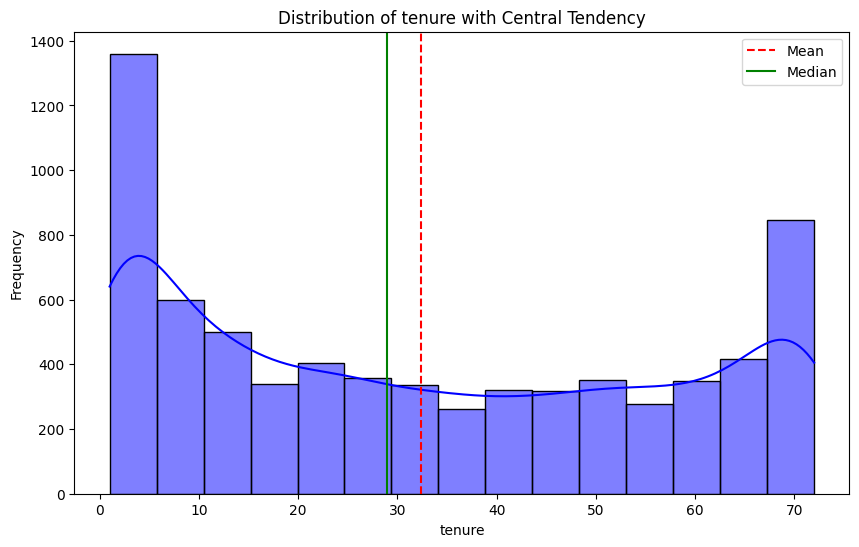

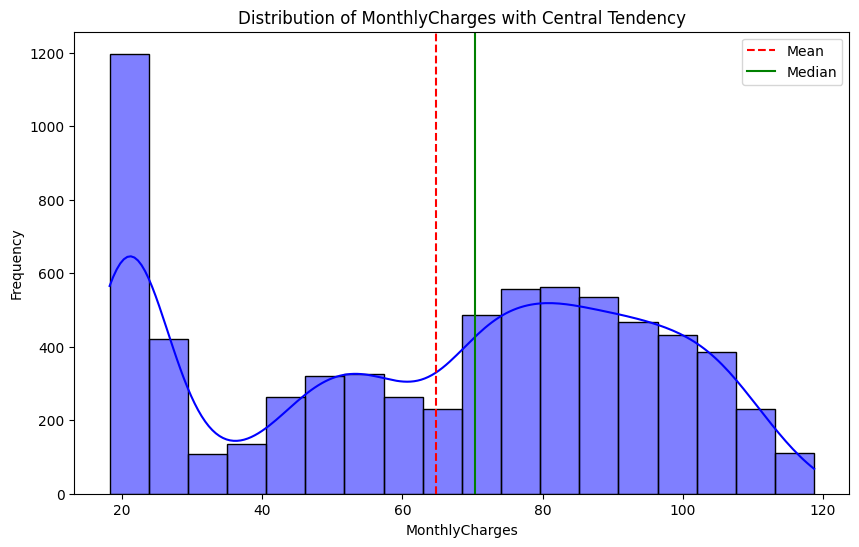

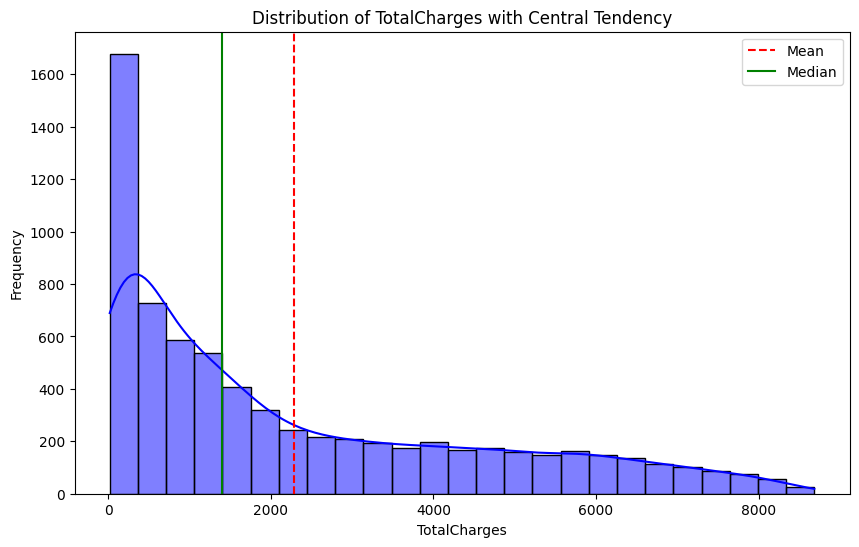

In [ ]:
def plot_histograms(eda_ohe_df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(eda_ohe_df[col], kde=True, color='blue')
        plt.axvline(x=eda_ohe_df[col].mean(), color='red', linestyle='--', label='Mean')
        plt.axvline(x=eda_ohe_df[col].median(), color='green', linestyle='-', label='Median')
        plt.legend()
        plt.title(f'Distribution of {col} with Central Tendency')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms(eda_ohe_df, ['tenure', 'MonthlyCharges', 'TotalCharges'])


# **Box Plots for Median, Range, and IQR**


---



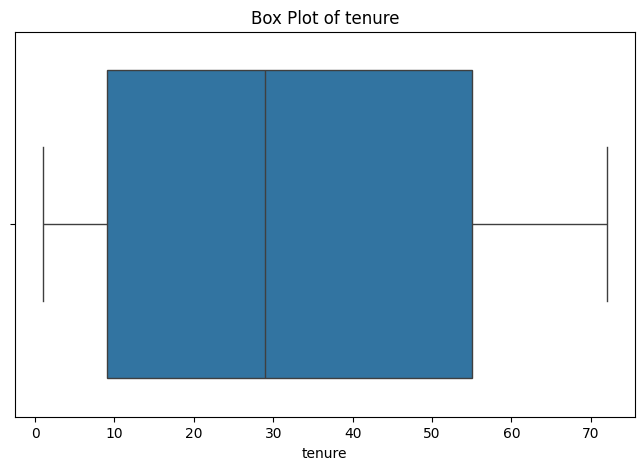

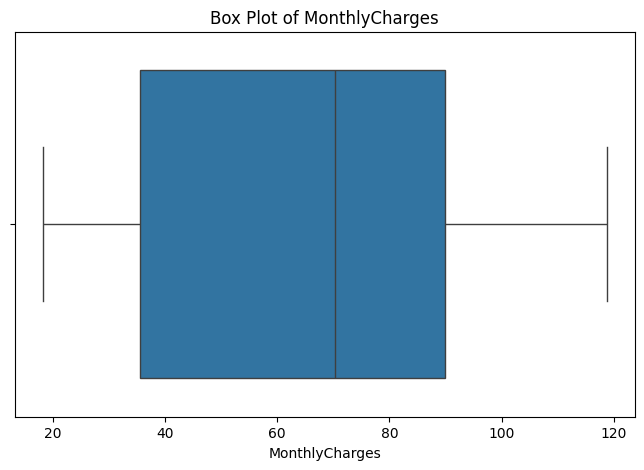

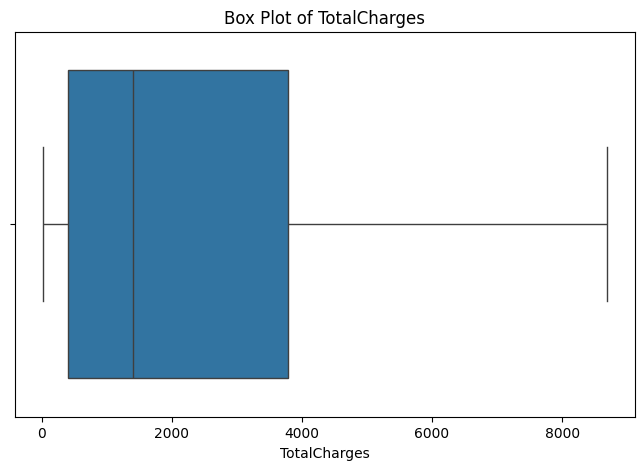

In [ ]:
def plot_boxplots(eda_ohe_df, columns):
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=eda_ohe_df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

plot_boxplots(eda_ohe_df, ['tenure', 'MonthlyCharges', 'TotalCharges'])

# **Bar Plots for Categorical Variables**


---



<ipython-input-50-de8cae957c08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=eda_ohe_df, palette='viridis')
<ipython-input-50-de8cae957c08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=eda_ohe_df, palette='viridis')
<ipython-input-50-de8cae957c08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=eda_ohe_df, palette='viridis')
<ipython-input-50-de8cae957c08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

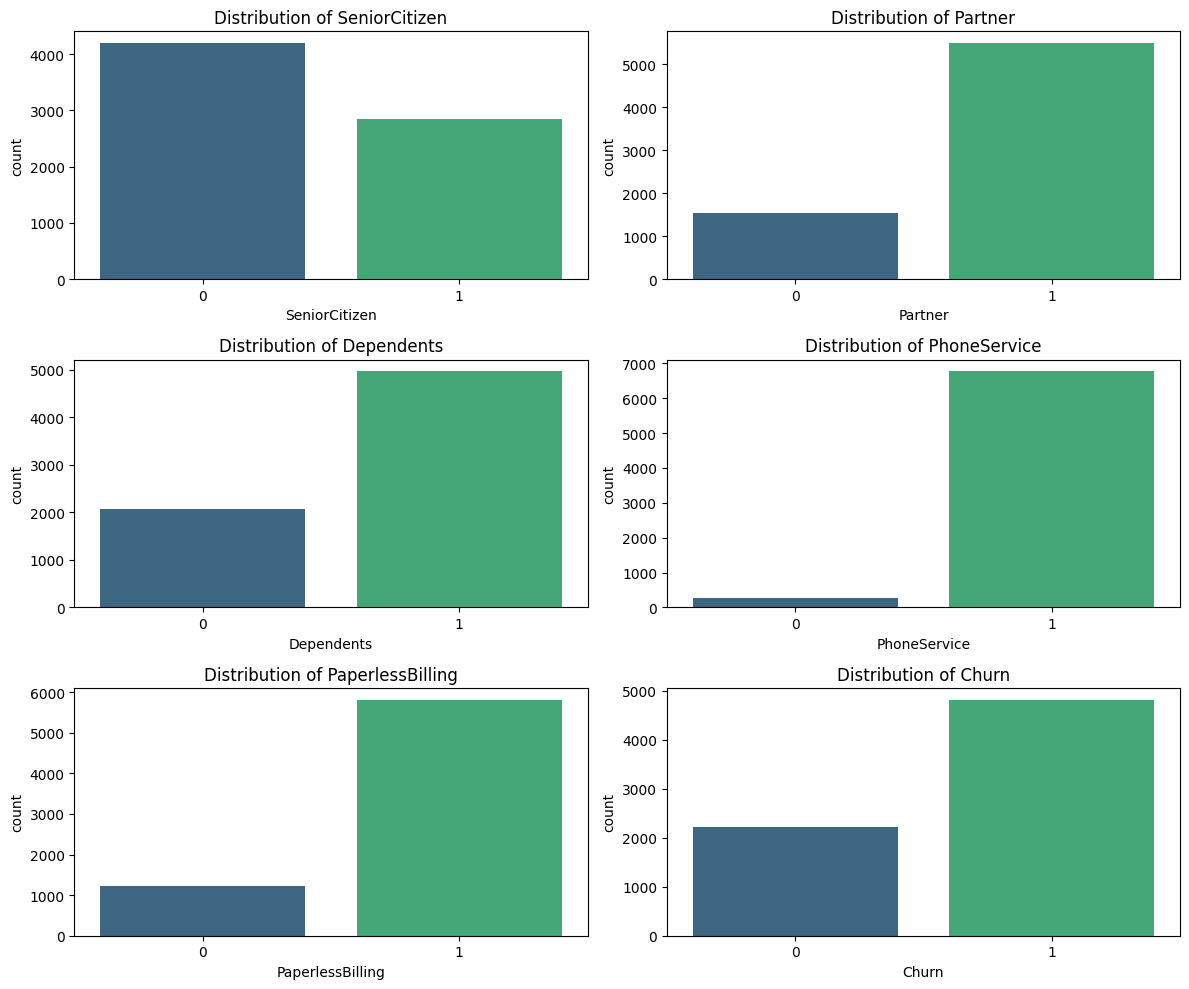

In [ ]:
# Bar plots for binary categorical variables
binary_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
plt.figure(figsize=(12, 10))
for i, col in enumerate(binary_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, data=eda_ohe_df, palette='viridis')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# **Stacked Bar Charts for Proportional Comparisons**


---



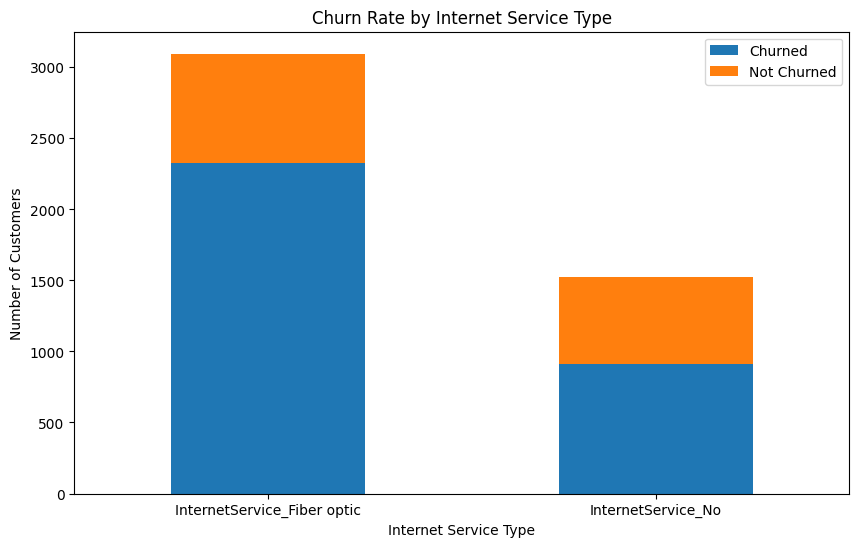

                  Service Type  Churned  Not Churned  Total  Churn Rate
0  InternetService_Fiber optic     2323          772   3095    0.750565
1           InternetService_No      911          610   1521    0.598948


In [ ]:
# Create a summary DataFrame for churn by internet service type
# Count the number of churned and non-churned customers for each internet service type
internet_service_types = ['InternetService_Fiber optic', 'InternetService_No']
summary_data = {
    'Service Type': [],
    'Churned': [],
    'Not Churned': [],
    'Total': [],
    'Churn Rate': []
}

for service in internet_service_types:
    churned = eda_ohe_df[eda_ohe_df['Churn'] == 1][service].sum()
    not_churned = eda_ohe_df[eda_ohe_df['Churn'] == 0][service].sum()
    total = churned + not_churned
    churn_rate = churned / total if total != 0 else 0

    summary_data['Service Type'].append(service)
    summary_data['Churned'].append(churned)
    summary_data['Not Churned'].append(not_churned)
    summary_data['Total'].append(total)
    summary_data['Churn Rate'].append(churn_rate)

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(summary_data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
summary_df.set_index('Service Type')[['Churned', 'Not Churned']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Churn Rate by Internet Service Type')
ax.set_xlabel('Internet Service Type')
ax.set_ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Display the DataFrame with Churn Rate
print(summary_df)

# **Density Plots for Comparison of Distributions**


---




<ipython-input-51-49f39bad4d25>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eda_ohe_df[eda_df['Churn'] == 1]['MonthlyCharges'], label='Churn=Yes', shade=True)
<ipython-input-51-49f39bad4d25>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eda_ohe_df[eda_ohe_df['Churn'] == 0]['MonthlyCharges'], label='Churn=No', shade=True)


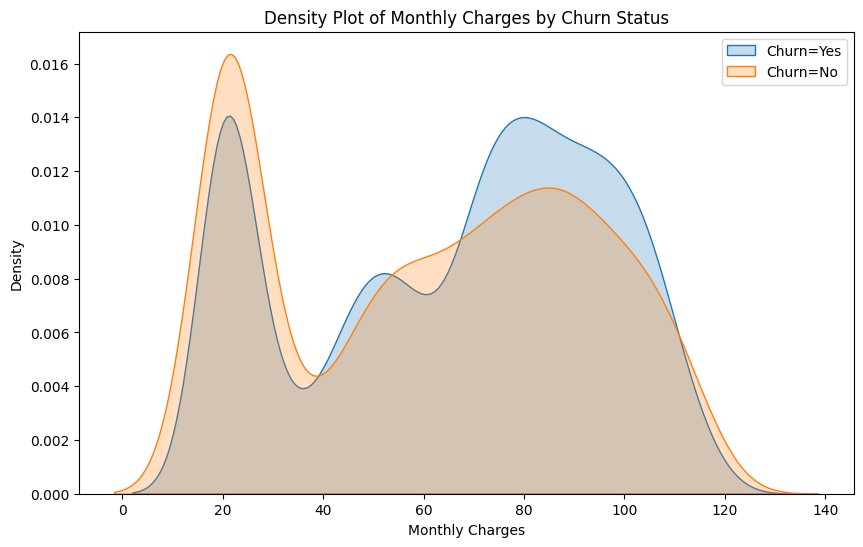

In [ ]:
# Density plot for MonthlyCharges by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(eda_ohe_df[eda_df['Churn'] == 1]['MonthlyCharges'], label='Churn=Yes', shade=True)
sns.kdeplot(eda_ohe_df[eda_ohe_df['Churn'] == 0]['MonthlyCharges'], label='Churn=No', shade=True)
plt.title('Density Plot of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

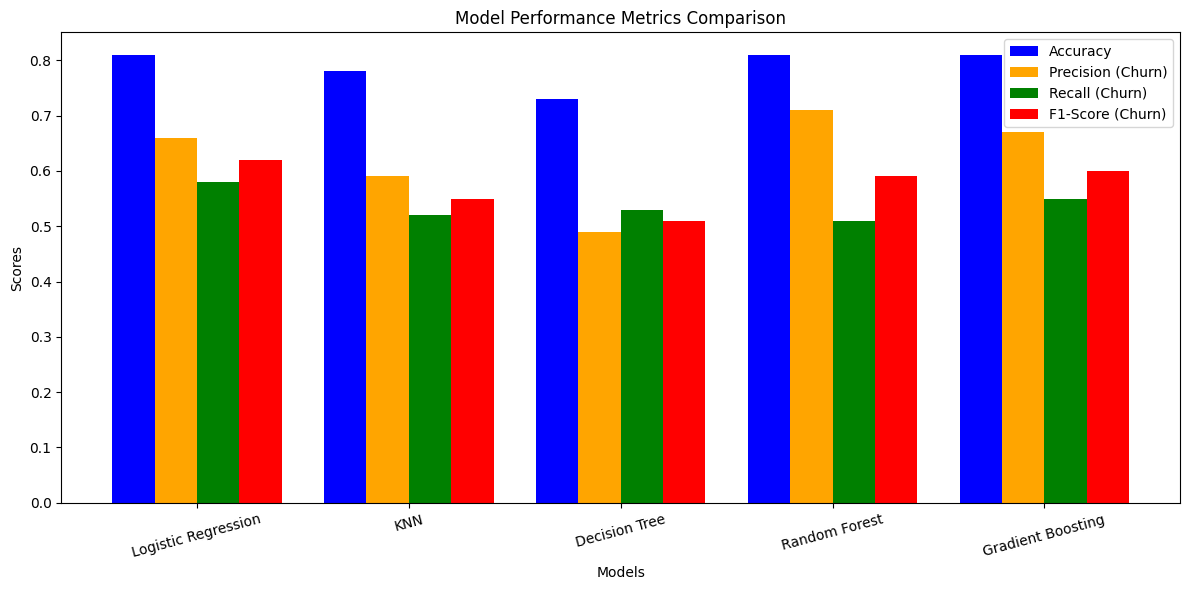

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define model performance metrics for visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy = [0.81, 0.78, 0.73, 0.81, 0.81]
precision_churn = [0.66, 0.59, 0.49, 0.71, 0.67]
recall_churn = [0.58, 0.52, 0.53, 0.51, 0.55]
f1_churn = [0.62, 0.55, 0.51, 0.59, 0.60]

# Create a bar plot for comparison
x = np.arange(len(models))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric
ax.bar(x - width, accuracy, width, label='Accuracy', color='blue')
ax.bar(x, precision_churn, width, label='Precision (Churn)', color='orange')
ax.bar(x + width, recall_churn, width, label='Recall (Churn)', color='green')
ax.bar(x + 2 * width, f1_churn, width, label='F1-Score (Churn)', color='red')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models, rotation=15)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


# **Distribution Analysis for Key Metrics**


---


Visualize the distribution of important metrics such as MonthlyCharges, TotalCharges, and tenure to understand their characteristics.

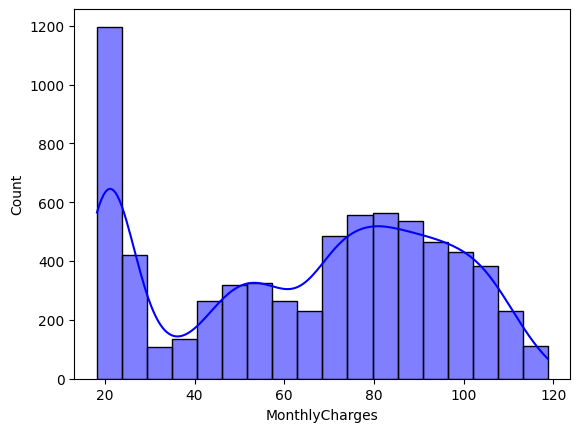

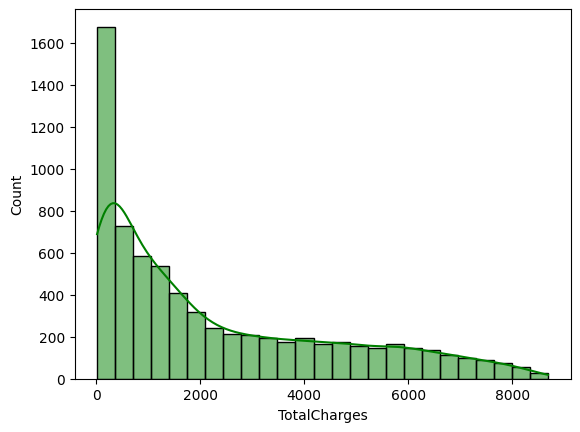

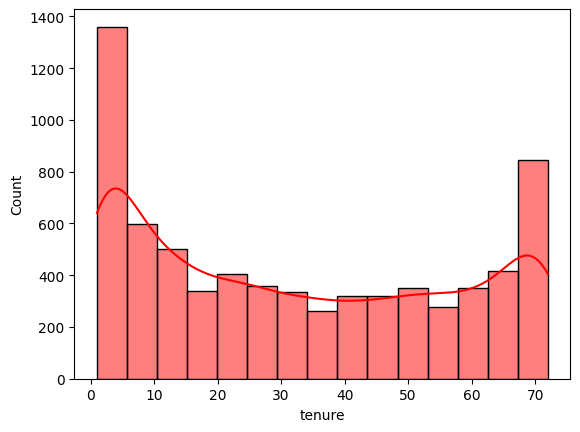

In [ ]:

# Histograms for numerical columns
sns.histplot(eda_ohe_df['MonthlyCharges'], kde=True, color='blue', label='Monthly Charges')
plt.show()

sns.histplot(eda_ohe_df['TotalCharges'], kde=True, color='green', label='Total Charges')
plt.show()

sns.histplot(eda_ohe_df['tenure'], kde=True, color='red', label='Tenure')
plt.show()

# **Correlation Analysis**


---


Explore how numerical features correlate with each other and particularly with the Churn variable.

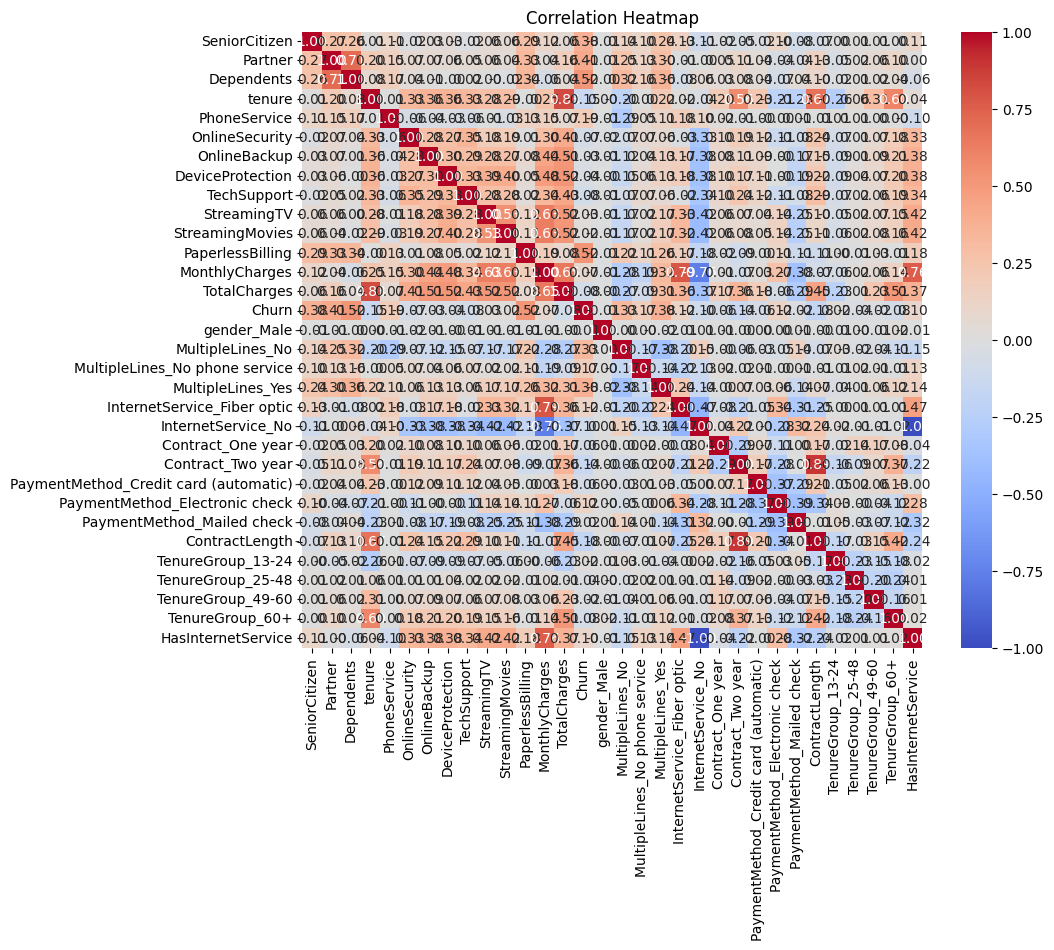

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda_ohe_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
import pandas as pd

# Create the DataFrame
data = {
    "Algorithm": ["K-means", "DBSCAN", "Hierarchical - complete"],
    "Silhouette": [0.45, 0.17, 0.38]
}
df = pd.DataFrame(data)

# Remove the row where Algorithm is "DBSCAN"
df = df[df["Algorithm"] != "DBSCAN"]
df.head()


,Algorithm,Silhouette
0,K-means,0.45
2,Hierarchical - complete,0.38


In [1]:
import pandas as pd

# Create a dictionary to represent the table
data = {
    "Categorical Type": ["Binary", "Binary", "Binary", "Binary", "Binary", "Binary",
                         "Nominal", "Nominal", "Nominal", "Nominal", "Nominal", "Nominal", "Nominal", "Nominal",
                         "Nominal", "Nominal", "Nominal", "Nominal", "Ordinal"],
    "Attribute Name": ["Gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "Churn",
                        "CustomerID", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                        "DeviceProtection", "TechSupport", "StreamingTv", "StreamingMovies",
                        "PaymentMethod", "Contract"],
    "Domain": ["{True, False}", "{True, False}", "{True, False}", "{True, False}", "{True, False}", "{True, False}",
               "Alphanumerical", "{Yes, No, No Phone Service}", "{DSL, Fiber, No}", "{No, Yes, No Internet Service}",
               "{No, Yes, No Internet Service}", "{No, Yes, No Internet Service}", "{No, Yes, No Internet Service}",
               "{No, Yes, No Internet Service}", "{No, Yes, No Internet Service}",
               "{Electronic check, Mailed check, Bank transfer, Credit card}", "{Month-to-month, 1year, 2year}"]
}

# Create the DataFrame
categorical_table = pd.DataFrame(data)

# Display the DataFrame
print(categorical_table)



ValueError: All arrays must be of the same length

# **Categorical Data Analysis**


---


Examine how categorical features such as Contract, PaymentMethod, etc., relate to churn.

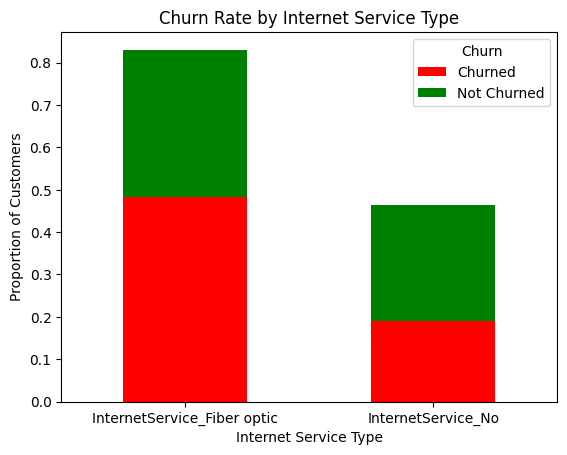

In [ ]:
# Create a new DataFrame to hold aggregated churn data
service_columns = ['InternetService_Fiber optic', 'InternetService_No']
churn_status = eda_ohe_df['Churn'].apply(lambda x: 'Churned' if x == 1 else 'Not Churned')

# Aggregate data
internet_service_churn = pd.DataFrame({
    service: eda_ohe_df[churn_status == 'Churned'][service].value_counts(normalize=True).get(1, 0)
    for service in service_columns
}, index=['Churned'])

internet_service_no_churn = pd.DataFrame({
    service: eda_ohe_df[churn_status == 'Not Churned'][service].value_counts(normalize=True).get(1, 0)
    for service in service_columns
}, index=['Not Churned'])

# Combine the data for visualization
combined_df = pd.concat([internet_service_churn, internet_service_no_churn]).T
combined_df.columns = ['Churned', 'Not Churned']

# Plotting
combined_df.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Proportion of Customers')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

# **Box Plots to Check for Outliers**


---


Identify outliers in the continuous data which might influence customer churn behavior.

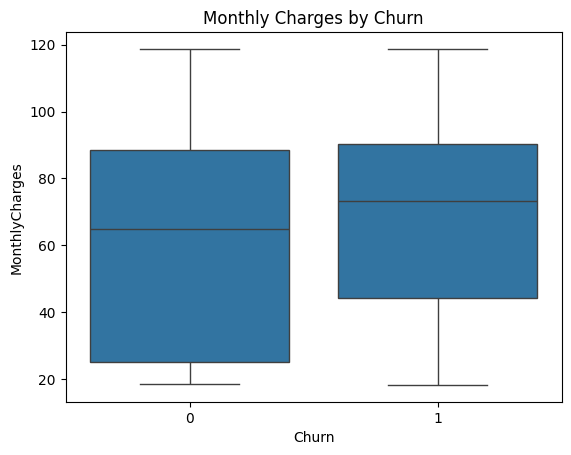

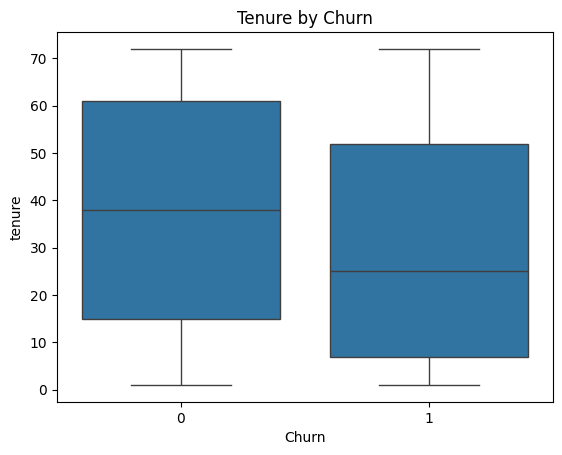

In [ ]:
# Box plots for numerical variables
sns.boxplot(x='Churn', y='MonthlyCharges', data=eda_ohe_df)
plt.title('Monthly Charges by Churn')
plt.show()

sns.boxplot(x='Churn', y='tenure', data=eda_ohe_df)
plt.title('Tenure by Churn')
plt.show()

# **Violin Plots for Numerical Data Distribution Across Categories**


---



<ipython-input-54-faab96745ab3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenureGroup', y='TotalCharges', data=eda_ohe_df, palette='viridis')


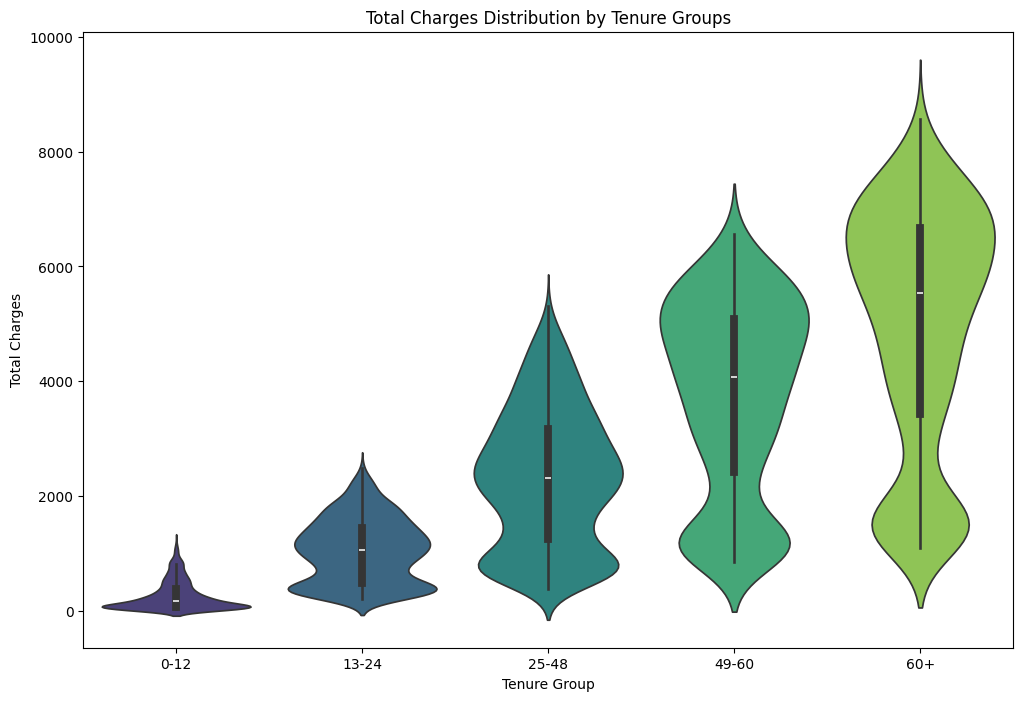

In [ ]:
# Violin plot for TotalCharges by Tenure groups
plt.figure(figsize=(12, 8))
sns.violinplot(x='TenureGroup', y='TotalCharges', data=eda_ohe_df, palette='viridis')
plt.title('Total Charges Distribution by Tenure Groups')
plt.xlabel('Tenure Group')
plt.ylabel('Total Charges')
plt.show()

# **Heatmap for Cross-Correlation of Features**


---



<Figure size 1200x800 with 0 Axes>

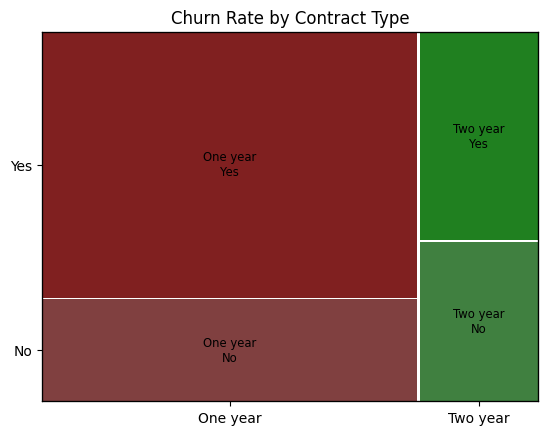

In [ ]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Create a new categorical column for 'Contract' based on one-hot encoded columns
eda_ohe_df['Contract'] = eda_ohe_df[['Contract_One year', 'Contract_Two year']].idxmax(axis=1).replace({
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
}).fillna('Month-to-month')

# Ensure 'Churn' is categorical with appropriate labels
eda_ohe_df['Churn'] = eda_ohe_df['Churn'].replace({0: 'No', 1: 'Yes'})

# Create a mosaic plot for Contract type vs Churn
plt.figure(figsize=(12, 8))
mosaic(eda_ohe_df, ['Contract', 'Churn'], title='Churn Rate by Contract Type')
plt.show()


# **Advanced Visualizations**


---


Visualize complex interactions using pair plots and scatter plots to see relationships between pairs of features.

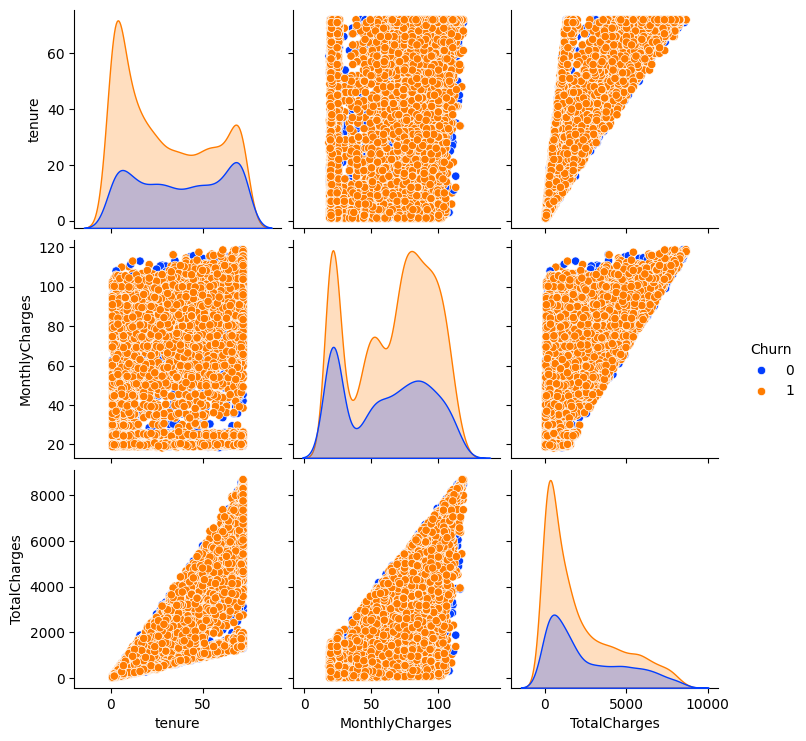

In [ ]:
# Pair plot for selected features
sns.pairplot(eda_ohe_df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette='bright')
plt.show()

# **Gender Distribution and Retention Insights**


---
how the customer base is divided by gender and the churn rates among these groups—providing insights into customer retention strategies based on demographic factors.


In [ ]:
# Labels for the pie charts
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Counts for gender and churn
gender_counts = [eda_ohe_df['gender_Male'].sum(), len(eda_ohe_df) - eda_ohe_df['gender_Male'].sum()]
churn_counts = [len(eda_ohe_df) - eda_ohe_df['Churn'].sum(), eda_ohe_df['Churn'].sum()]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Adding pie chart for Gender
fig.add_trace(go.Pie(labels=g_labels, values=gender_counts, name="Gender"),
              1, 1)

# Adding pie chart for Churn
fig.add_trace(go.Pie(labels=c_labels, values=churn_counts, name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# Layout updates
fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.82, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

# **Comprehensive Breakdown of Customer Churn and Gender Distribution**


---



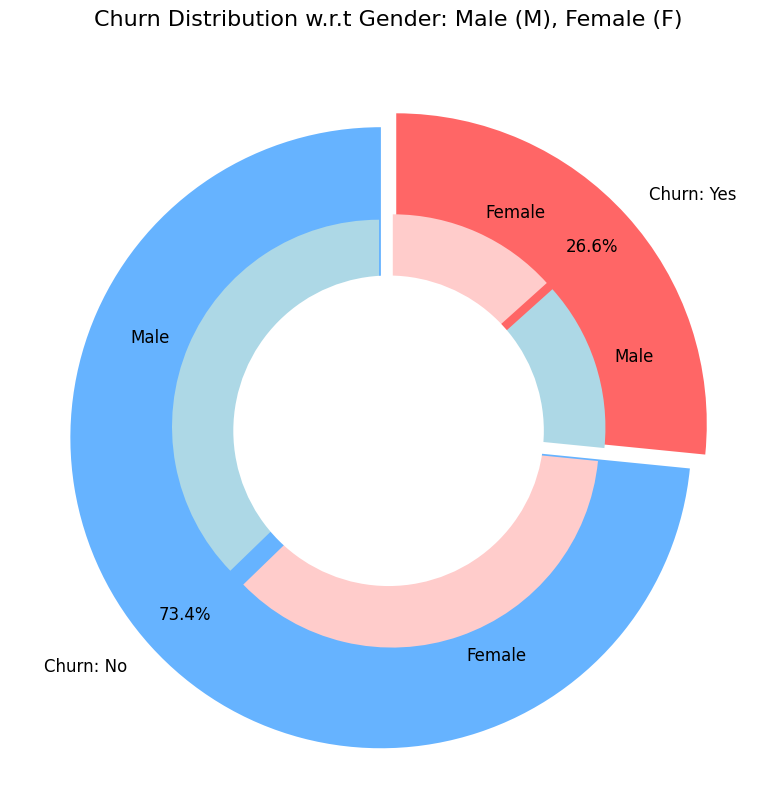

In [ ]:
# Set figure size for better visibility
plt.figure(figsize=(8, 8))

# Labels and data for the outer pie (Churn)
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
colors = ['#ff6666', '#66b3ff']
explode = (0.1, 0.1)  # Increase explosion distance for clarity

# Labels and data for the inner pie (Gender)
labels_gender = ["Female", "Male", "Female", "Male"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#ffcccb', '#add8e6', '#ffcccb', '#add8e6']
explode_gender = (0.1, 0.1, 0.1, 0.1)  # Uniform explosion for symmetry

textprops = {"fontsize": 12}  # Adjust font size for readability

# Plot outer pie (Churn)
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1,
        colors=colors, startangle=90, frame=True, explode=explode, radius=3, textprops=textprops,
        counterclock=False)

# Plot inner pie (Gender within Churn)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90,
        explode=explode_gender, radius=2, textprops=textprops, counterclock=False)

# Draw a white circle at the center to turn pie into donut
centre_circle = plt.Circle((0, 0), 1.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and plot adjustments
plt.title('Churn Distribution w.r.t Gender: Male (M), Female (F)', fontsize=16, pad=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

# **Histogram Visualization**


---



In [ ]:
# Define color mapping based on churn status
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create the histogram
fig = px.histogram(eda_ohe_df, x="Churn", color="PhoneService",
                   title="<b>Churn Distribution with Respect to Phone Service</b>",
                   color_discrete_map=color_map)

# Update layout
fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,  # Adjust the gap between bars
    xaxis_title="Churn Status",  # X-axis label
    yaxis_title="Count",  # Y-axis label
    legend_title="Phone Service"  # Legend title
)

# Show the plot
fig.show()

In [ ]:
fig = px.histogram(eda_ohe_df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(eda_ohe_df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(eda_ohe_df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(eda_ohe_df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(eda_ohe_df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
# Define a dictionary to map the encoded columns back to a readable format
payment_mapping = {
    'PaymentMethod_Credit card (automatic)': 'Credit Card (Automatic)',
    'PaymentMethod_Electronic check': 'Electronic Check',
    'PaymentMethod_Mailed check': 'Mailed Check'
}

# Prepare the data: convert the one-hot encoded payment methods to a single column
eda_ohe_df['PaymentMethodType'] = (eda_ohe_df[['PaymentMethod_Credit card (automatic)',
                                               'PaymentMethod_Electronic check',
                                               'PaymentMethod_Mailed check']]
                                   .idxmax(axis=1)
                                   .map(payment_mapping))

# Create the histogram
fig = px.histogram(eda_ohe_df, x="Churn", color="PaymentMethodType",
                   title="<b>Customer Payment Method Distribution w.r.t. Churn</b>",
                   category_orders={"PaymentMethodType": list(payment_mapping.values())})  # Optional: to enforce a specific order

# Update layout
fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,  # Adjust the gap between bars
    xaxis_title="Churn Status",  # X-axis label
    yaxis_title="Count",  # Y-axis label
    legend_title="Payment Method"  # Legend title
)

# Show the plot
fig.show()

# **Churn Rate by Tenure Groups**


---


This visualization will show how churn rates vary with customer tenure.

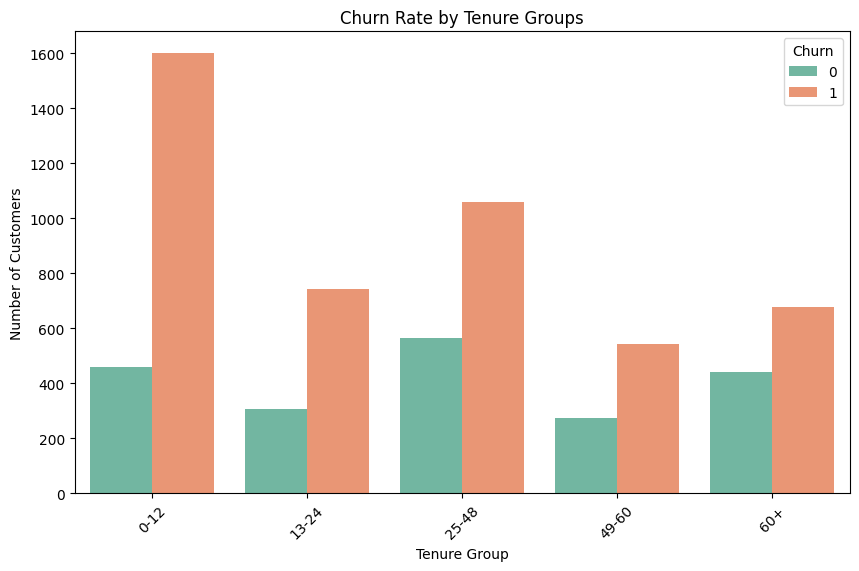

In [ ]:
# Assuming 'TenureGroup' is already defined in your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='TenureGroup', hue='Churn', data=eda_ohe_df, palette='Set2')
plt.title('Churn Rate by Tenure Groups')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# **Monthly Charges Distribution for Churned vs. Non-Churned Customers**


---


We'll explore if there's a difference in monthly charges between churned and non-churned customers.

<ipython-input-78-53a9b5d4a1fc>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




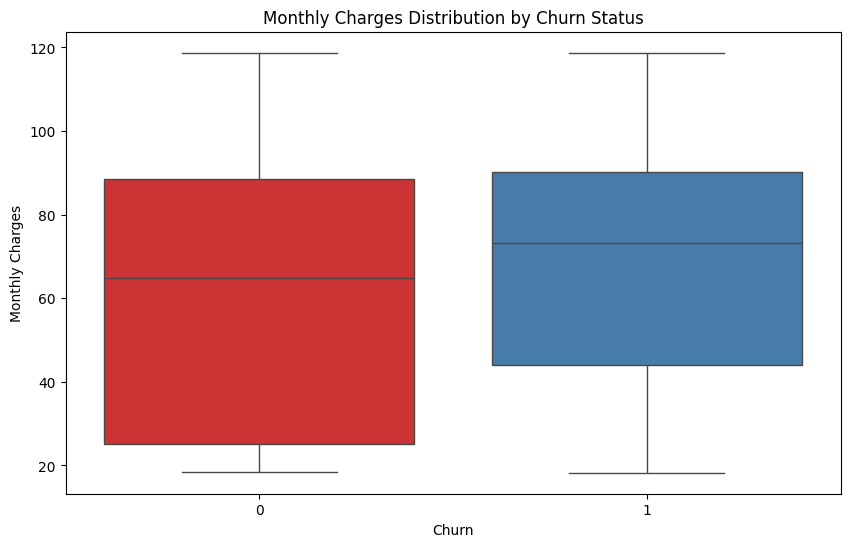

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=eda_ohe_df, palette='Set1')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [1]:
# Re-import necessary libraries after reset
import pandas as pd
from IPython.display import display

# Create a dataframe for the 2nd dataset
data = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "SeniorCitizen": [7032.0, 0.403584, 0.490651, 0.0, 0.0, 0.0, 1.0, 1.0],
    "Partner": [7032.0, 0.781428, 0.413307, 0.0, 1.0, 1.0, 1.0, 1.0],
    "Dependents": [7032.0, 0.705774, 0.455727, 0.0, 0.0, 1.0, 1.0, 1.0],
    "tenure": [7032.0, 32.414249, 24.541242, 1.0, 9.0, 29.0, 55.0, 72.0],
    "PhoneService": [7032.0, 0.962031, 0.191136, 0.0, 1.0, 1.0, 1.0, 1.0],
    "PaperlessBilling": [7032.0, 0.826507, 0.378700, 0.0, 1.0, 1.0, 1.0, 1.0],
    "MonthlyCharges": [7032.0, 64.785545, 30.085834, 18.25, 35.55, 70.35, 89.85, 118.75],
    "TotalCharges": [7032.0, 2282.238823, 2265.897697, 18.8, 401.45, 1397.1, 3792.33, 8684.8],
    "Churn": [7032.0, 0.685154, 0.464488, 0.0, 0.0, 1.0, 1.0, 1.0],
}

df = pd.DataFrame(data)
display(df)


,Statistic,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
1,mean,0.403584,0.781428,0.705774,32.414249,0.962031,0.826507,64.785545,2282.238823,0.685154
2,std,0.490651,0.413307,0.455727,24.541242,0.191136,0.378700,30.085834,2265.897697,0.464488
3,min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
4,25%,0.000000,1.000000,0.000000,9.000000,1.000000,1.000000,35.550000,401.450000,0.000000
5,50%,0.000000,1.000000,1.000000,29.000000,1.000000,1.000000,70.350000,1397.100000,1.000000
6,75%,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3792.330000,1.000000
7,max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000
